In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Leitura dos Dados

In [2]:
Atributos = tuple(["Data", "Partida", "Nome", "Nota", "Area", "Posição", "Min", "Gols", "Assist.", "Pênalti recebido", 
                "Total de chutes", "Chutes no gol", "Chutes para fora", "Trave", "Chutes interceptados", "Chances perdidas", 
                "Impedimentos", "Passes decisivos", "Quase gol", "Passes completados", "Passes longos completados", 
                "Cruzamentos completos", "Dribles completos", "Toques", "Faltas recebidas", "Pênalti cometido", "Faltas cometidas", 
                "Posse de bola perdida", "Driblado", "Perigo afastado", "Interceptações", "Bolas recuperadas", 
                "Vitória em duelos por baixo", "Vitória em duelos por cima", "Defesas", "Gols sofridos", "Pênalti defendido",
                "Reposição de soco", "Erros que terminaram em chute adversário", "Defesa pelo alto", "Seleção"])

df = pd.read_table("./data/def.txt", sep = ';', decimal=".",header=None, names=Atributos, parse_dates=['Data'], dayfirst=True)

In [3]:
df.fillna(0, inplace=True)
df.head()

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
0,2022-11-13,Fulham 1x2 Man Utd,Luke Shaw,7.5,Defesa,Lateral Esquerdo,90,0,0,0.0,...,1/1 (100%),2/5 (40%),1/2 (50%),0.0,0.0,0,0.0,0.0,0.0,Inglaterra
1,2022-11-13,Fulham 1x2 Man Utd,Lisandro Martínez,7.4,Defesa,Zagueiro Central,90,0,0,0.0,...,0,3/5 (60%),4/5 (80%),0.0,0.0,0,0.0,0.0,0.0,Argentina
2,2022-11-13,Fulham 1x2 Man Utd,Tyrell Malacia,6.4,Defesa,Lateral Esquerdo,90,0,0,0.0,...,1/1 (100%),0,0,0.0,0.0,0,0.0,0.0,0.0,Holanda
3,2022-11-13,Fulham 1x2 Man Utd,Christian Eriksen,8.4,Ataque,Meia Atacante,90,1,1,0.0,...,1/1 (100%),0,0,0.0,0.0,0,0.0,0.0,0.0,Dinamarca
4,2022-11-13,Fulham 1x2 Man Utd,Casemiro,7.8,Ataque,Meio de Campo Central,90,0,0,0.0,...,3/3 (100%),5/6 (83%),5/8 (62%),0.0,0.0,0,0.0,0.0,0.0,Brasil


In [59]:
#padronizando tamanho da fonte
font = {'family': "DejaVu Sans",
        'size': 8}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [5,4]

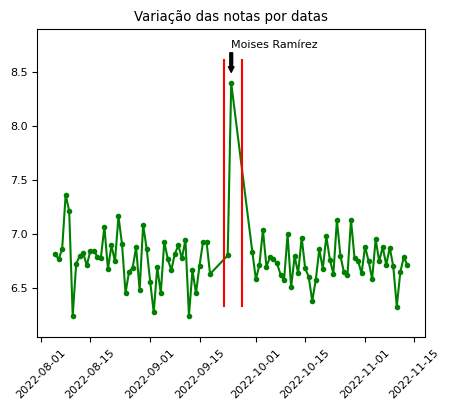

In [63]:

# evolução das medias por dia(Geral)

media_notas_por_data = df.groupby(df.Data)["Nota"].mean()
plt.plot(media_notas_por_data, color = 'g', marker = '.')
datas_fifa = [datetime(2022,9,22), #"Início data fifa"
              datetime(2022,9,27)] #"Fim data fifa"
dia = datetime(2022,9,24)
plt.annotate("Moises Ramírez", xy = (dia, 8.5), xytext = (dia, 8.8), 
                arrowprops = dict(facecolor = 'black', headwidth = 4, width = 2, headlength = 4),
                horizontalalignment = 'left', verticalalignment = 'top')
[plt.axvline(i ,0.1, 0.9, color = 'r') for i in datas_fifa]
plt.xticks(rotation = 45)
plt.ylim(media_notas_por_data.min() - 0.2, media_notas_por_data.max() + 0.5)
plt.title("Variação das notas por datas")
plt.show()

In [61]:
data_fifa_inicio = df[df.Data > datetime(2022,9,22)]
data_fifa_inicio[data_fifa_inicio.Data < datetime(2022,9,29)]

,Data,Partida,Nome,Nota,Area,Posição,Min,Gols,Assist.,Pênalti recebido,...,Bolas recuperadas,Vitória em duelos por baixo,Vitória em duelos por cima,Defesas,Gols sofridos,Pênalti defendido,Reposição de soco,Erros que terminaram em chute adversário,Defesa pelo alto,Seleção
7785,2022-09-23,Puebla 2x1 Pumas,Daniel Alves,6.8,Defesa,Lateral Direito,90,0,0,0.0,...,1/3 (33.3%),0,0,0.0,0.0,0,0.0,0.0,0.0,Brasil
8524,2022-09-24,Independiente del Valle 1x0 Macara,Moises Ramírez,8.4,Defesa,Goleiro,90,0,0,0.0,...,0,0,0,5.0,0.0,0,2.0,0.0,0.0,Equador


É perceptível uma média de notas que se comporta como um outlier durante o período Fifa, período em que as principais ligas europeias não jogam. Esse outlier ocorreu porque um jogador equatioriano teve uma grande performance no dia em questão, enquanto ninguem mais jogava.

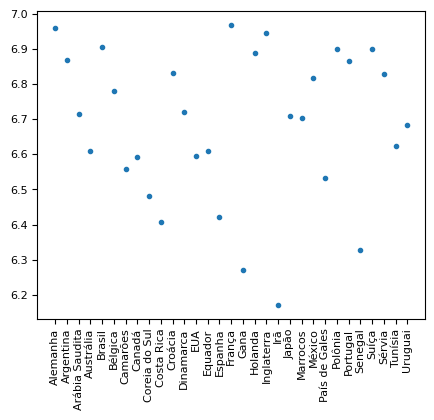

In [62]:
selecoes = df["Seleção"].unique()
plt.figure(figsize=(5,4))
notaMediaPorSelecao = df.groupby("Seleção", as_index=False)["Nota"].mean()
plt.scatter(notaMediaPorSelecao["Seleção"], notaMediaPorSelecao["Nota"], marker = '.')
plt.xticks(rotation = 90)
plt.show()

## Remoção de seleções menos tradicionais

**Seleções tadicionais** serão aquelas que tiveram pelo menos duas aparições na fase de mata-mata desde 2010

In [ ]:
Tradicionais = tuple(["Argentina", "Australia",])

In [ ]:
media_notas_por_mes = df.groupby(df.Data.dt.month).mean()

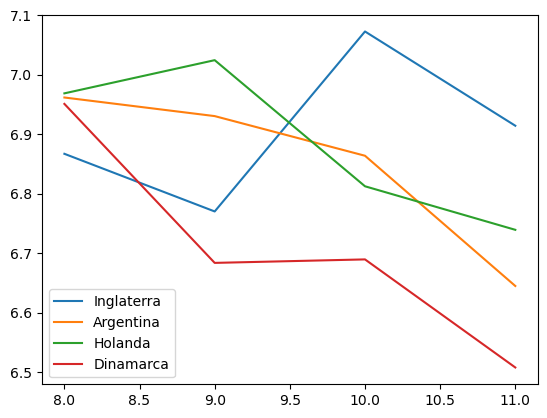

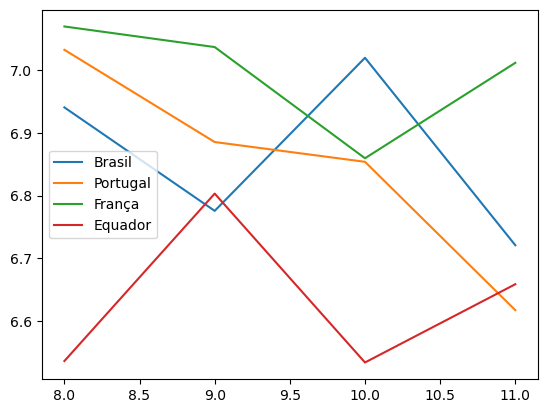

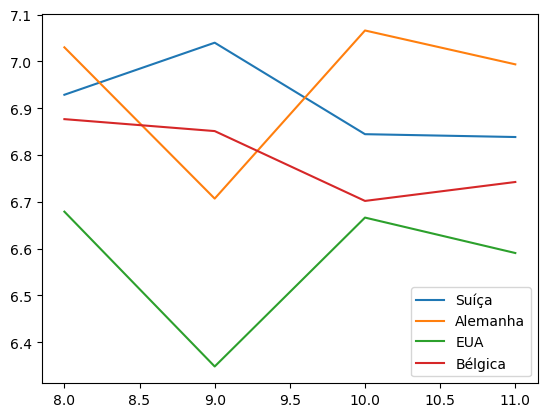

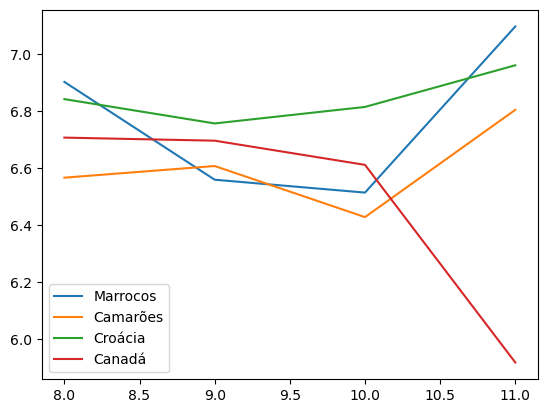

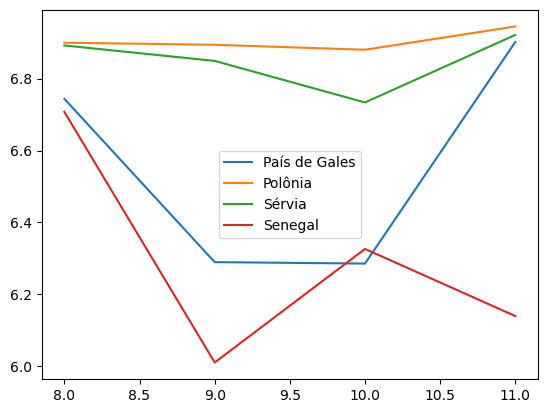

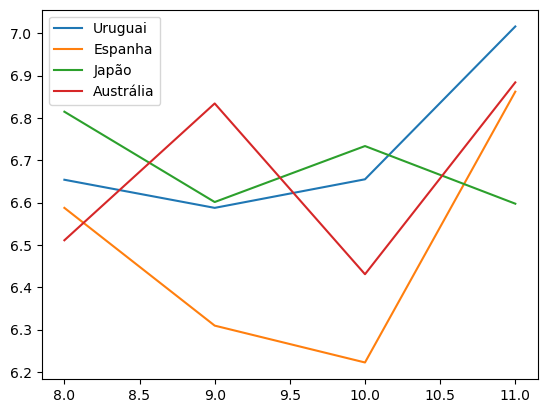

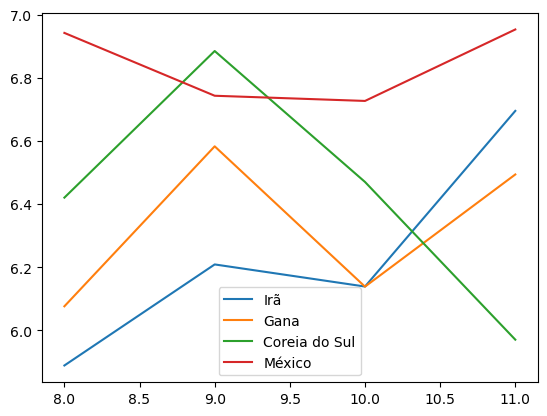

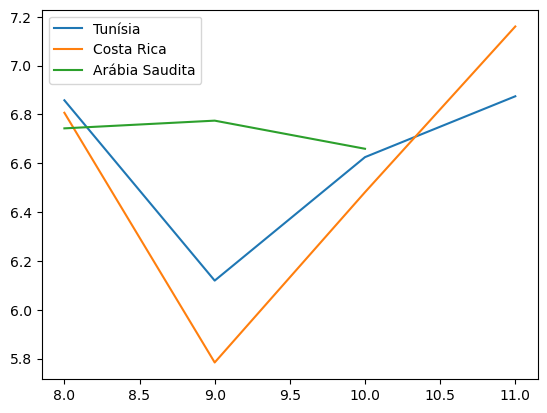

In [7]:
for i in range(round(len(selecoes)/4)):
    for sel in selecoes[(4*i): 4 * (i+1)]:
        notas = df.query(f"Seleção == '{sel}'").groupby(df.Data.dt.month)["Nota"].mean()
        plt.plot(notas, label = sel)
    plt.legend()
    plt.show()